In [1]:
from nptdms import TdmsFile
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib.mlab import PCA
import npfeintool as npF
from npfeintool import filterVar
import matplotlib.pyplot as plt
import ruptures as rpt


/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected

In [3]:
# load in data, take the TDMS data type as example
tdms_file = TdmsFile("AKF-FW1-1-H1021-1500.tdms")
#preprocessing the data type 'DINT' 
df = tdms_file.object('DINT').as_dataframe()
df_power = df['SupplyUnit 50U4 (Unidrive M701 Regen).Transmit PDO Mapping 8.Leistung']

/usr/local/lib/python3.5/dist-packages/nptdms/tdms.py:772: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  for ch in self.tdms_file.group_channels(self.group)])


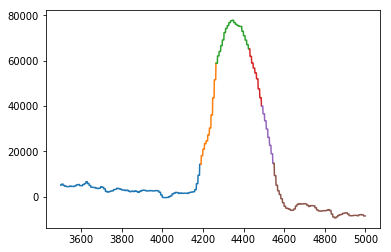

In [65]:
# change point detection-----model l1
n_bkps=5  # the number of checkpoint
model = "l1"  # "l2", "rbf"
a = 3500   # get one unit to do the segmentation
b = 5000
data = df_power[a:b].values
algo = rpt.Dynp(model=model, min_size=15, jump=15).fit(data)
my_bkps = algo.predict(n_bkps)

# show results
#rpt.show.display(signal, bkps, my_bkps, figsize=(10, 6))
#plt.show()
i=0
st=a
while i<= n_bkps:
    df_power[st:my_bkps[i]+a].plot()
    st = my_bkps[i]+a
    i = i+1

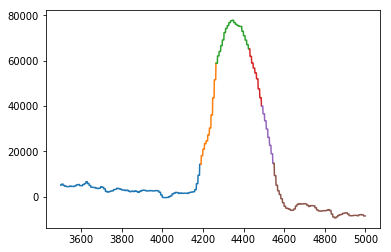

In [66]:
# change point detection-----model l2
n_bkps=5  # the number of checkpoint
model = "l2"  # "l2", "rbf"
a = 3500   # get one unit to do the segmentation
b = 5000
data = df_power[a:b].values
algo = rpt.Dynp(model=model, min_size=15, jump=15).fit(data)
my_bkps = algo.predict(n_bkps)

# show results
#rpt.show.display(signal, bkps, my_bkps, figsize=(10, 6))
#plt.show()
i=0
st=a
while i<= n_bkps:
    df_power[st:my_bkps[i]+a].plot()
    st = my_bkps[i]+a
    i = i+1

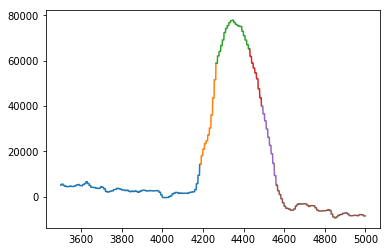

In [67]:
# change point detection-----model rbf
n_bkps=5  # the number of checkpoint
model = "rbf"  # "l2", "rbf"
a = 3500   # get one unit to do the segmentation
b = 5000
data = df_power[a:b].values
algo = rpt.Dynp(model=model, min_size=15, jump=15).fit(data)
my_bkps = algo.predict(n_bkps)

# show results
#rpt.show.display(signal, bkps, my_bkps, figsize=(10, 6))
#plt.show()
i=0
st=a
while i<= n_bkps:
    df_power[st:my_bkps[i]+a].plot()
    st = my_bkps[i]+a
    i = i+1